# Import libraries and app key

In [56]:
import refinitiv.dataplatform.eikon as ek
import numpy as np
import pandas as pd
from datetime import datetime as dt
mask = '%Y%m%d'
dte = dt.now().strftime(mask)
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

import plotly.express as px
ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')

# Import Refinitiv layout for charts

In [57]:
def refinitiv_layout(figure):
    figure.update_layout(margin=dict(t=5, b=5, l=10, r=10),
        plot_bgcolor='#1A1A1D',
        paper_bgcolor='#1A1A1D',
        yaxis=dict(gridcolor='black', gridwidth=1, zerolinecolor='black', zerolinewidth=1, 
                   side='right', color='#D6D6D5', linecolor='#D6D6D5', ticks='outside'),
        xaxis=dict(gridcolor='black', gridwidth=1, zerolinecolor='black', zerolinewidth=1, 
                   color='#D6D6D5', linecolor='#D6D6D5', ticks='outside'),
        colorway=['#6978F7', '#A325E9', '#96E05D', '#4A7FB9', '#E75A2D', '#FBE55A', '#8C8C8D', '#5A54F6'],
        legend=dict(font=dict(color='#D6D6D5'), orientation='v', yanchor='top', xanchor='center', y=1.1, x=0.1),
        title = dict(xanchor='center', yanchor='top', x=0.5, font=dict(color='#D6D6D5')),
        font=dict(color='#D6D6D5')
    )
    return

# Retrieve portfolio constituents and details

In [58]:
portfolio = 'Portfolio(SAMPLE_GL_DEV)'
df, err = ek.get_data(portfolio, ['TR.PortfolioConstituentName','TR.PortfolioName','TR.PortfolioWeight','TR.TRESGScore', 'TR.TRBCEconomicSector','TR.ExchangeCountry','TR.ExchangeRegion'])
df['Issuer Name'] = df['Issuer Name'].str.title() 
df['Portfolio Name'] = df['Portfolio Name'].str.title() 
#Renaming Country of Exchange to Exchange Country for consistency
df.rename(columns = {'Country of Exchange':'Exchange Country'}, inplace = True) 
df.rename(columns = {'TRBC Economic Sector Name':'TRBC Economic Sector'}, inplace = True) 
#df.head()

# List of instruments with no ESG coverage

In [59]:
df_esg_na = df[df['ESG Score'].isnull()].copy()
df_esg_na['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_esg_na['Portfolio Weight']], index = df_esg_na.index)
df_esg_na = df_esg_na.style.set_table_attributes("style='display:inline'").set_caption('Instruments Without ESG Coverage')
#df_esg_na.hide_index()

# List of instruments with ESG coverage

In [60]:
df_esg_full = df[df['ESG Score'].notna()].copy()
df_esg_full['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_esg_full['Portfolio Weight']], index = df_esg_full.index)
df_esg_full = df_esg_full.style.set_table_attributes("style='display:inline'").set_caption('Instruments With ESG Coverage')
#df_esg_full.hide_index()

# Portfolio ESG Coverage

In [61]:
display_html(df_esg_na._repr_html_()+ ' ' + df_esg_full._repr_html_(), raw=True)

,Instrument,Issuer Name,Portfolio Name,Portfolio Weight,ESG Score,TRBC Economic Sector,Exchange Country,Exchange Region
0,.ONECHF,Swiss Franc,Global Developed,0.005%,nan,None,None,
1,.ONEUKP,U K Pound,Global Developed,0.005%,nan,None,None,
2,.ONEUSD,U S Dollar,Global Developed,0.005%,nan,None,None,
3,.ONEEUR,Euro,Global Developed,0.005%,nan,None,None,
,Instrument,Issuer Name,Portfolio Name,Portfolio Weight,ESG Score,TRBC Economic Sector,Exchange Country,Exchange Region
4,CSL.AX,Csl Ltd,Global Developed,2.418%,78.6222,Healthcare,Australia,Oceania
5,9202.T,Ana Holdings Inc,Global Developed,1.956%,75.2584,Industrials,Japan,Asia
6,6367.T,Daikin Industries Ltd,Global Developed,1.284%,67.8821,Industrials,Japan,Asia
7,9042.T,Hankyu Hanshin Holdings Inc,Global Developed,0.967%,27.7633,Industrials,Japan,Asia
8,6701.T,Nec Corp,Global Developed,3.209%,82.8184,Technology,Japan,Asia


# Export to excel the list of instruments covered by ESG

In [62]:
fname = "Portfolio_ESG_{}.xlsx".format(dte)
#df_esg_full.to_excel(fname)

# % of portfolio with ESG coverage

In [70]:
df_esg_sum = df[df['ESG Score'].notna()].copy()
df_esg_sum = df_esg_sum['Portfolio Weight'].sum()
df_esg_sum = "{:.2%}".format(df_esg_sum)
df_esg_sum

'99.98%'

# Normalize weights of the securities covered by ESG

In [99]:
df_esg_port = df[df['ESG Score'].notna()].copy()
df_esg_port['ESG Portfolio Weight'] = df_esg_port['Portfolio Weight'].transform(lambda x: x / x.sum())
#df_esg_port.head()

# Top 5 holdings

In [100]:
df_top = df.nlargest(5,'Portfolio Weight')
df_top = df_top[['Instrument','Issuer Name','Portfolio Weight','ESG Score','TRBC Economic Sector']]
df_top['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_top['Portfolio Weight']], index = df_top.index)
df_top = df_top.style.set_table_attributes("style='display:inline'").set_caption('Top 5 holdings')
#df_top.hide_index()

# Bottom 5 holdings

In [77]:
df_bottom = df.nsmallest(5,'Portfolio Weight')
df_bottom = df_bottom[['Instrument','Issuer Name','Portfolio Weight','ESG Score','TRBC Economic Sector']]
df_bottom['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_bottom['Portfolio Weight']], index = df_bottom.index)
df_bottom = df_bottom.style.set_table_attributes("style='display:inline'").set_caption('Bottom 5 holdings')
#df_bottom.hide_index()

# Top & bottom 5 holdings

In [79]:
display_html(df_top._repr_html_()+ ' ' + df_bottom._repr_html_(), raw=True)

,Instrument,Issuer Name,Portfolio Weight,ESG Score,TRBC Economic Sector
35,ORCL.N,Oracle Corp,4.052%,52.3625,Technology
51,ACN.N,Accenture Plc,3.691%,71.8864,Technology
54,TMUS.OQ,T-Mobile Us Inc,3.424%,31.5915,Telecommunications Services
13,6502.T,Toshiba Corp,3.361%,86.4178,Industrials
8,6701.T,Nec Corp,3.209%,82.8184,Technology
,Instrument,Issuer Name,Portfolio Weight,ESG Score,TRBC Economic Sector
0,.ONECHF,Swiss Franc,0.005%,nan,None
3,.ONEEUR,Euro,0.005%,nan,None
1,.ONEUKP,U K Pound,0.005%,nan,None
2,.ONEUSD,U S Dollar,0.005%,nan,None


# Top 5 holdings by ESG Score

In [124]:
df_esg_top = df_esg_port.nlargest(5,'ESG Score')
df_esg_top = df_esg_top[['Instrument','Issuer Name','ESG Score','Portfolio Weight','TRBC Economic Sector']]
df_esg_top = df_esg_top.style.set_table_attributes("style='display:inline'").set_caption('Top 5 holdings by ESG Score')
df_esg_top.hide_index()

Instrument,Issuer Name,ESG Score,Portfolio Weight,TRBC Economic Sector
6502.T,Toshiba Corp,86.4178,0.0336054,Industrials
HUM.N,Humana Inc,85.9176,0.0133707,Healthcare
SPGI.N,S&P Global Inc,84.2486,0.0201681,Industrials
NEM.N,Newmont Corporation,83.9279,0.0122865,Basic Materials
BSX.N,Boston Scientific Corp,83.551,0.0136647,Healthcare


# Bottom 5 holdings by ESG Score

In [123]:
df_esg_bottom = df_esg_port.nsmallest(5,'ESG Score')
df_esg_bottom = df_esg_bottom[['Instrument','Issuer Name','ESG Score','Portfolio Weight','TRBC Economic Sector']]
df_esg_bottom = df_esg_bottom.style.set_table_attributes("style='display:inline'").set_caption('Bottom 5 holdings by Combined ESG Score')
df_esg_bottom.hide_index()

Instrument,Issuer Name,ESG Score,Portfolio Weight,TRBC Economic Sector
9042.T,Hankyu Hanshin Holdings Inc,27.7633,0.00967487,Industrials
TMUS.OQ,T-Mobile Us Inc,31.5915,0.0342365,Telecommunications Services
CNC.N,Centene Corp,34.1856,0.00886638,Healthcare
TWLO.N,Twilio Inc,34.9985,0.0083222,Technology
UBER.N,Uber Technologies Inc,36.7778,0.0132579,Technology


# Top & bottom 5 holdings by ESG

In [125]:
display_html(df_esg_top._repr_html_()+ ' ' + df_esg_bottom._repr_html_(), raw=True)

Instrument,Issuer Name,ESG Score,Portfolio Weight,TRBC Economic Sector
6502.T,Toshiba Corp,86.4178,0.0336054,Industrials
HUM.N,Humana Inc,85.9176,0.0133707,Healthcare
SPGI.N,S&P Global Inc,84.2486,0.0201681,Industrials
NEM.N,Newmont Corporation,83.9279,0.0122865,Basic Materials
BSX.N,Boston Scientific Corp,83.551,0.0136647,Healthcare
Instrument,Issuer Name,ESG Score,Portfolio Weight,TRBC Economic Sector
9042.T,Hankyu Hanshin Holdings Inc,27.7633,0.00967487,Industrials
TMUS.OQ,T-Mobile Us Inc,31.5915,0.0342365,Telecommunications Services
CNC.N,Centene Corp,34.1856,0.00886638,Healthcare
TWLO.N,Twilio Inc,34.9985,0.0083222,Technology


# Define weighted average

In [101]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

# Portfolio ESG Score by Region

In [118]:
df_esg_region = df_esg_port.groupby(['Exchange Region']).apply(wavg, 'ESG Score','ESG Portfolio Weight')
df_esg_region = df_esg_region.to_frame('ESG Score').reset_index()
df_esg_region['ESG Score'] = df_esg_region['ESG Score'].apply(lambda x: round(x, 3))
df_esg_region = df_esg_region.style.set_table_attributes("style='display:inline'").set_caption('Portfolio ESG Score by Region')
df_esg_region.hide_index()

Exchange Region,ESG Score
America,61.092
Asia,71.279
Europe,75.552
Oceania,78.622


# Portfolio Allocation by Region

In [104]:
df_region_allo = df_esg_port.groupby(['Exchange Region'])['ESG Portfolio Weight'].sum()
df_region_allo = df_region_allo.to_frame('Portfolio Weight').reset_index()
df_region_allo['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_region_allo['Portfolio Weight']], index = df_region_allo.index)
df_region_allo = df_region_allo.style.set_table_attributes("style='display:inline'").set_caption('Portfolio Allocation by Region')
df_region_allo.hide_index()

Exchange Region,Portfolio Weight
America,72.228%
Asia,20.584%
Europe,4.770%
Oceania,2.418%


# Portfolio ESG Score by Country

In [126]:
df_esg_country = df_esg_port.groupby(['Exchange Country']).apply(wavg, 'ESG Score','ESG Portfolio Weight')
df_esg_country = df_esg_country.to_frame('ESG Score').reset_index()
df_esg_country['ESG Score'] = df_esg_country['ESG Score'].apply(lambda x: round(x, 3))
df_esg_country = df_esg_country.style.set_table_attributes("style='display:inline'").set_caption('Portfolio ESG Score by Country')
df_esg_country.hide_index()

Exchange Country,ESG Score
Australia,78.622
Canada,66.022
Denmark,69.895
Germany,73.885
Hong Kong,75.101
Japan,70.142
Korea; Republic (S. Korea),78.531
Norway,81.766
Sweden,78.031
United States of America,60.85


# Portfolio Allocation by Country

In [111]:
df_country_allo = df_esg_port.groupby(['Exchange Country'])['ESG Portfolio Weight'].sum()
df_country_allo = df_country_allo.to_frame('Portfolio Weight').reset_index()
df_country_allo['Portfolio Weight'] = pd.Series(["{0:.3f}%".format(val * 100) for val in df_country_allo['Portfolio Weight']], index = df_country_allo.index)
df_country_allo = df_country_allo.style.set_table_attributes("style='display:inline'").set_caption('Portfolio Allocation by Country')
df_country_allo.hide_index()

Exchange Country,Portfolio Weight
Australia,2.418%
Canada,3.391%
Denmark,1.438%
Germany,1.185%
Hong Kong,2.758%
Japan,16.667%
Korea; Republic (S. Korea),1.158%
Norway,1.283%
Sweden,0.864%
United States of America,68.837%


# Portfolio Allocation and ESG Score by Region

In [131]:
display_html(df_region_allo._repr_html_()+ ' ' + df_esg_region._repr_html_(), raw=True)

Exchange Region,Portfolio Weight
America,72.228%
Asia,20.584%
Europe,4.770%
Oceania,2.418%
Exchange Region,ESG Score
America,61.092
Asia,71.279
Europe,75.552
Oceania,78.622


# Portfolio Allocation and ESG Score by Country

In [132]:
display_html(df_country_allo._repr_html_()+ ' ' + df_esg_country._repr_html_(), raw=True)

Exchange Country,Portfolio Weight
Australia,2.418%
Canada,3.391%
Denmark,1.438%
Germany,1.185%
Hong Kong,2.758%
Japan,16.667%
Korea; Republic (S. Korea),1.158%
Norway,1.283%
Sweden,0.864%
United States of America,68.837%


# ESG sunburst chart

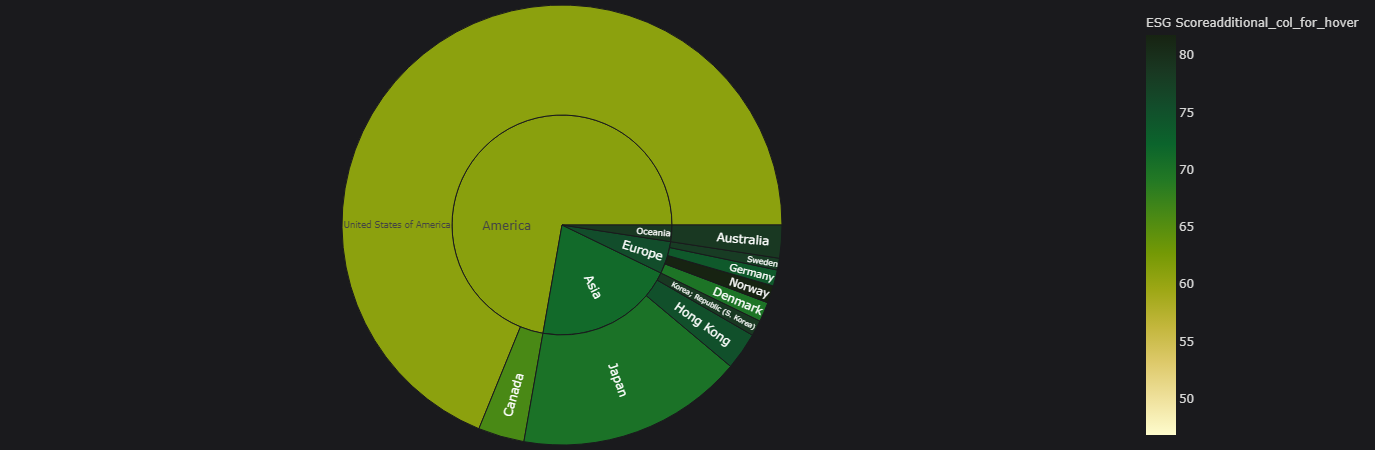

In [133]:
df_cht = df_esg_port
fig = px.sunburst(df_cht, path=['Exchange Region', 'Exchange Country'], values='ESG Portfolio Weight',
                  color='ESG Score', hover_data=['ESG Score'],
                  color_continuous_scale='Speed',
                  color_continuous_midpoint=np.average(df_cht['ESG Score'], weights=df_cht['ESG Portfolio Weight']))
fig.update_traces(insidetextorientation='radial') 
fig.layout.template = 'plotly_dark'
refinitiv_layout(fig)
fig